# NLE Assessed Coursework 1

For this assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about these coursework questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.

In [2]:
candidateno=167974 #this MUST be updated to your candidate number so that you get a unique data sample


In [3]:
#preliminary imports
import sys
sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
sys.path.append(r'/Users/juliewe/Documents/teaching/NLE2018/resources')

import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.tokenize import word_tokenize

from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
import random
from nltk.corpus import stopwords

Sussex NLTK root directory is \\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources


# Question 1: Naive Bayes Classification (25 marks)

In this question, you will be considering how a Naive Bayes classifier can be applied to the task of deciding whether sentences are relevant or not relevant to the kitchen domain.

The code below will generate for you two small unique sets of sentences, which you should refer to in your answer to this question.   This question will be marked on the quality of your explanations rather than the quality of your code.

In [4]:
#Do NOT change the code in this cell.

topics=["book","kitchen","dvd","electronics"]
samplesize=3
stop=stopwords.words('english')

trainingsentences=[]
testsentences=[]
cr = AmazonReviewCorpusReader()

for topic in topics:
    random.seed(candidateno)
    if topic == "kitchen":
        key="kitchen"
    else:
        key="not-kitchen"
    topicsentences=[]
    while len(topicsentences)<2:
        topicsentences=[({token.lower():True for token in doc if token not in stop and token.isalpha()},key) for doc in cr.category(topic).sample_sents(samplesize=samplesize) if len(doc)>0]
    testsentences.append(topicsentences[0])
    trainingsentences+=topicsentences[1:]

random.shuffle(trainingsentences)
random.shuffle(testsentences)
print("Number of training sentences is {}.  Number of testing sentences is {}".format(len(trainingsentences),len(testsentences)))


Number of training sentences is 7.  Number of testing sentences is 4


In [5]:
total_kitchen_words = 0
total_nonkitchen_words = 0
for each in trainingsentences:
    for val in each[0]:
        if each[1] == "kitchen":
            total_kitchen_words +=1
        else:
            total_nonkitchen_words += 1
        print(val, ":" , each[1])
print("Total kitchen words: ",total_kitchen_words)
print("Total non kitchen words: ",total_nonkitchen_words)

print(testsentences[0])

i : not-kitchen
loved : not-kitchen
sparks : not-kitchen
book : not-kitchen
the : not-kitchen
notebook : not-kitchen
added : not-kitchen
books : not-kitchen
must : not-kitchen
read : not-kitchen
list : not-kitchen
now : not-kitchen
old : not-kitchen
age : not-kitchen
i : not-kitchen
pangs : not-kitchen
conscience : not-kitchen
happily : not-kitchen
closed : not-kitchen
book : not-kitchen
finishing : not-kitchen
the : not-kitchen
show : not-kitchen
really : not-kitchen
works : not-kitchen
season : not-kitchen
cuz : not-kitchen
reason : not-kitchen
worked : not-kitchen
first : not-kitchen
two : not-kitchen
katt : not-kitchen
culp : not-kitchen
selleca : not-kitchen
great : not-kitchen
team : not-kitchen
deserved : not-kitchen
better : not-kitchen
scripts : not-kitchen
usually : not-kitchen
got : not-kitchen
unlike : not-kitchen
many : not-kitchen
i : not-kitchen
seen : not-kitchen
film : not-kitchen
first : not-kitchen
came : not-kitchen
i : kitchen
happy : kitchen
i : kitchen
owned : ki

a) With reference to the sentences generated above, **explain** how a Naive Bayes classifer would be trained to carry out the task of deciding whether sentences are relevant to the kitchen domain.  You do **not** need to build or train a classifier.  However, you should explain the relevant probabilities with reference to examples taken from your samples of sentences.  \[10 marks\]

A Naive Bayes Classifier works by using two sets of data to train a classifier which will be able to produce a probability based on the training data we have given it to determine if a document in our testing data is a certain classification. For this example we will be working with the probabilities for 'kitchen' and 'not-kitchen'.

$$P(X|Y) = \frac{P(Y|X)\cdot P(X)}{P(Y)}$$ 
This is the **Bayes** rule, it is the underlying principle of our Naive Bayes Classifier. We let our variables X be defined as the class we are going to be identifying, in this case it will be kitchen and not-kitchen. Y becomes the document that we are classifying. Then to determine which class it falls under we compare the probabilities and the greater of the two should lead to the correct classification.

$$P(X|Y)\ becomes\ for\ our\ two\ classes \ P(\,\mbox{kitchen}\,|\,d)\ \mbox{versus}\ P(\,\mbox{not-kitchen}\,|\,d)$$

The classifier works with pre calculated elements to produce a resulting probability. These elements are the class priors and the conditional probability. 

#### Class Prior:

$P(\,\mbox{Class}\,)=\frac{X}{Y}$: This is the definition of a class prior, the probability that a class will occur in the training set. This is calculated from how many times a class occurs in our training set (X) and then divided by the total amount of documents in the training set (Y).

##### From the Training Data

_Kitchen_ -- The class prior from the given set is: $\frac{2}{7}$   _Non-Kitchen_ -- The class prior from  the given set is: $\frac{5}{7}$

#### Conditional Probability:

i.e. $P(\,\mbox{Word}\,|\,\mbox{Class})=\frac{X}{Y}$: This is the of conditional probability, it is used to determine the likelihood of finding a word based on its recurrence in our training data. This is dependant on the document class as only the words present in the documents for the respective class are counted against each other to produce the probability. 

##### From the Training Data

_Kitchen_  Word  :**Book**  -- The conditional probability for this class  is: $\frac{1}{17}$   _Non-Kitchen_ -- The probability for this class from the given set is: $\frac{2}{58}$


b) With reference to the sentences generated above, **explain** how a trained Naive Bayes classifier would assign a class to a sentence. \[5 marks\]

The Naive Bayes will use the training data to become "trained", this will allows the classification to more reliably select the correct class for a given document or in this case a sentence. 

Selecting a value stored in our testing set we get: $ (\{'i': True,\ 'never': True,\ 'disappointed': True,\ 'performance': True\}, \ 'kitchen') $

To then run the sentence through our classifier would result in the following:

$$P(\,d\,|\,c\,) = P(X|Y) = \frac{P(Y|X)\cdot P(X)}{P(Y)}$$  

With class $kitchen = c1$ and class $non-kitchen = c2 \ , $ Sentence $d=\{Word_1,\ldots,Word_n\}$, we have:
\begin{eqnarray*}
P(\,d\,|\,c1\,) &=& P(\,\{Word_1,\ldots,Word_n\}\,|\,c\,)\\
&=& \prod_{i=1}^n P(\,w_i\,|\,c1\,) = Kitchen Probability 
\end{eqnarray*} 
\begin{eqnarray*}
P(\,d\,|\,c2\,) &=& P(\,\{Word_1,\ldots,Word_n\}\,|\,c\,)\\
&=& \prod_{i=1}^n P(\,w_i\,|\,c2\,) = Non-Kitchen Probability 
\end{eqnarray*}

The larger of these resulting probablites will be the one that the classifer chooses to be the correct class.


c) The labels assigned to the sentences contained in the variable `testsentences` above are \['kitchen','not-kitchen','not-kitchen','not-kitchen'\].  Using this example to illustrate your answer, **explain** how each of the performance metrics of *accuracy*, *precision*, *recall* and *F1-score* are calculated.  Which of these metrics would you use to choose between classification models in this example?  **Justify your answer**. \[10 marks\]


Accuracy is defined by the following:
$$Accuracy =\dfrac{|\{i|\mbox{prediction}(i)=\mbox{label}(i)\}|}{|\{i\}|} = \dfrac{True Positive + True Negative}{Total Predictions}$$ 

True positives plus the true negatives that we derive from our true class and predicted class confusion matrix. A high degree of accuracy is desirable as this allows us to predict classes with less unreliability. 

Precision and Recall go hand in hand together: 

$$ Precision = \dfrac{True Positive}{True Positive + False Positive} \qquad  Recall = \dfrac{True Positive}{True Positive + False Negative} $$ 

Precision is the proportion of predictions that the classifier makes that are correct and Recall is the proportion of documents that are actually predicted correctly. It is good to have both high precision and recall as this is a good indication of a working classifier, however most of the time we tend to have a trade-off based on our classifications. When we have an equal amount of false negatives and false positives (and our accuracy is high) we have a balanced trade off. The standard naive bayes decision boundary is $\dfrac{1}{2}$. The decision boundary can be moved to accommodate for either Precision or Recall, increasing the number of false positives leads to higher precision and increasing the number of false negatives leads to a better recall.

F1 Score is the result of combining Precision and Recall, creating a mean of the two values. 

$$ F1 Score = \dfrac{2 * Precision * Recall}{Precision + Recall} $$

This is a useful metric as sometimes one of our precision or recall metrics can be greater or less than the other. F1 score allows us to have a more balanced view of how the classifier is working at classifying our document.

**The Test Data** -- $ ['kitchen'\ ,\ 'not-kitchen'\ ,\ 'not-kitchen'\ ,\ 'not-kitchen']$ 
Based on our test data we can see that it is not evenly weighted which would lead to an uneven confusion matrix. The best metric to see how accurate the classifier is, is the F1 Score, as this will show a weighted result based on how good the classification is overall from the recall and precision.


## Question 2: Training Data for Sentiment Analysis (25 marks)
The objective of this question is to investigate the extent to which performance of a Naive Bayes classifier is affected by the quantity and quality of the training data.  Does more training data mean better performance?  Is performance degraded if we train on one domain and test on another domain?  For example, suppose we train a sentiment classifier on book reviews and then test that classifier on a collection of dvd reviews. Does it perform as well as it would when trained on dvd reviews?

The code below is included to enable you to get pre-formatted training and test data for a given category (evenly split between positive and negative reviews).  In this question, there are marks available for the quality of your programming, your experimental design and your interpretation of results.


In [518]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def feature_extract(review):
    """
    Generate a feature representation for a review
    :param review: AmazonReview object
    :return: dictionary of Boolean features
    """
    return {word:True for word in review.words()}

def get_training_test_data(category,ratio=0.7,seed=candidateno):
    """
    Get training and test data for a given category and ratio, pre-formatted for use with NB classifier
    :param category: category of review corpus, one of ["kitchen, "dvd", "book", "electronics"]
    :param ratio: proportion of data to use as training data
    :return: pair of lists 
    """
    reader=AmazonReviewCorpusReader().category(category)
    random.seed(candidateno)
    pos_train, pos_test = split_data(reader.positive().documents(),ratio=ratio)
    neg_train, neg_test = split_data(reader.negative().documents(),ratio=ratio)
    train_data=[(feature_extract(review),'P')for review in pos_train]+[(feature_extract(review),'N') for review in neg_train]
    test_data=[(feature_extract(review),'P')for review in pos_test]+[(feature_extract(review),'N') for review in neg_test]
    return train_data,test_data


a) By varying the amount of training data used, **investigate** the impact of the amount of training data used on the accuracy of a Naive Bayes classifier for each of the four domains: *dvd*, *book*, *kitchen* and *electronics*.  You should use the NaiveBayesClassifier from the `nltk.classify` library.  You should also use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

In [519]:
import nltk

In [520]:
def reduced_training_set(data): # Defintion of algorithim that will produce a list of sliced training documents
    #split = 10 
    data_set = []
    for x in range(9,-1,-1): #Loop repeats 10 times from 10 to 0 
        #split -= 1 
        data_set.append(data[int(len(data) * x/20) : int(len(data))]) #This adds a slice from a point in the list of training documents to the end of the given list, to our list 
    return data_set

Review_Topics = ["kitchen", "dvd", "book", "electronics"]
Train_Data = []
Test_Data = []

for topic in Review_Topics: #A loop to get all the required test and training data
    Train_Data.append(get_training_test_data(topic)[0])
    Test_Data.append(get_training_test_data(topic)[1])
total_accuracy_dict = {}

    """
    A looping structure that is created to produce an accuarcy result for each training and test domain, 
    with the varying training size.
    """

for x in range(4):
    current_result = {}
    current_slice_val = 0
    for sliced_set in reduced_training_set(Train_Data[x]):
        classifier = nltk.NaiveBayesClassifier.train(sliced_set)
        current_result[current_slice_val] = round(nltk.classify.accuracy(classifier, Test_Data[x]),4)
        current_slice_val+= 1
    total_accuracy_dict[x] = (current_result.copy())

,Kitchen,DVD,Book,Electronics
55%,0.6117,0.6333,0.5933,0.6017
60%,0.7533,0.7450,0.7167,0.7150
65%,0.7833,0.7200,0.7117,0.7417
70%,0.7933,0.7767,0.6967,0.7583
75%,0.7983,0.7683,0.7283,0.7850
80%,0.7917,0.7617,0.7267,0.7700
85%,0.8000,0.7750,0.7283,0.7633
90%,0.8133,0.7950,0.7050,0.7950
95%,0.8083,0.7950,0.6933,0.8083
100%,0.8217,0.8033,0.6817,0.8033


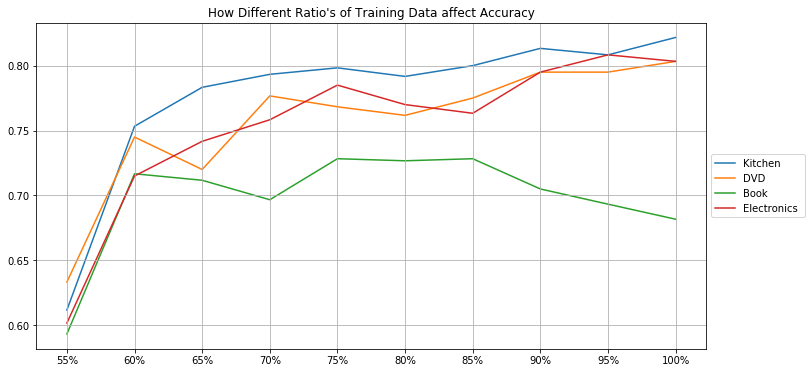

In [521]:
df = pd.DataFrame(total_accuracy_dict)
df.index = ['55%', '60%','65%','70%','75%','80%','85%','90%','95%','100%']
df.columns = ['Kitchen ', 'DVD ', 'Book ', 'Electronics ']
display(df)

df.plot(kind='line', stacked=False, rot=0, figsize=(12,6), legend=False, zorder=1, title=("How Different Ratio's of Training Data affect Accuracy"))
plt.grid(zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([0,1,2,3,4,5,6,7,8,9],df.index)
plt.show()


The question required a varying amount of training data to be used to train our naive bayes classifier to classify our test data. I split the varying amounts by ratio, working from 50% of the supplied training data and moving in increments of 5 towards 100%. 

I expected to see that as we increase the training ratio from the lower ratio to the higher ratio that this would lead to an increase in the classifier accuracy.

I plotted the results onto a line graph as this is a useful resource to see how the accuracy varies across the changing training data ratio. For my seeded data set, it is seen that for Kitchen, Dvd and Electronics that increasing the training ratio increased the accuracy; all points at 90% are greater than at 60% as illustrated by the graph.

The outlier here however is the Book topic. It seems as if our classifer was not able to correctly predict the correct classification as we increased the training set. It even is shown to descrease with 100% of the training set having lower accuracy than when at 60%. This indicates that our classifer was identifying with either too many false postives or false negatives resulting in a loss of accuracy. 

b) For each possible combination of source and target domain, **evaluate** the accuracy of a Naive Bayes classifier trained on the source domain and tested on the target domain.  There are four domains so there are 16 possible combinations you should consider.  You should use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

In [562]:
Review_Topics = ["kitchen", "dvd", "book", "electronics"]
Train_Data = []
Test_Data = []

for topic in Review_Topics:
    Train_Data.append(get_training_test_data(topic)[0])
    Test_Data.append(get_training_test_data(topic)[1])
    
storage_list = {}
accuracy_list = {}
current_list = 0
for each_set in Train_Data:
    classifier = nltk.NaiveBayesClassifier.train(each_set)
    for x in range(4):
        accuracy_list[x] = round(nltk.classify.accuracy(classifier, Test_Data[x]),4)
    storage_list[current_list] = (accuracy_list.copy())
    current_list += 1
    accuracy_list.clear()


,Kitchen Training,DVD Training,Book Training,Electronics Training
Kitchen Test Domain,0.8217,0.6883,0.5717,0.7467
DVD Test Domain,0.6750,0.8033,0.6333,0.7167
Book Test Domain,0.6933,0.7400,0.6817,0.6633
Electronics Test Domain,0.7417,0.6617,0.5550,0.8033


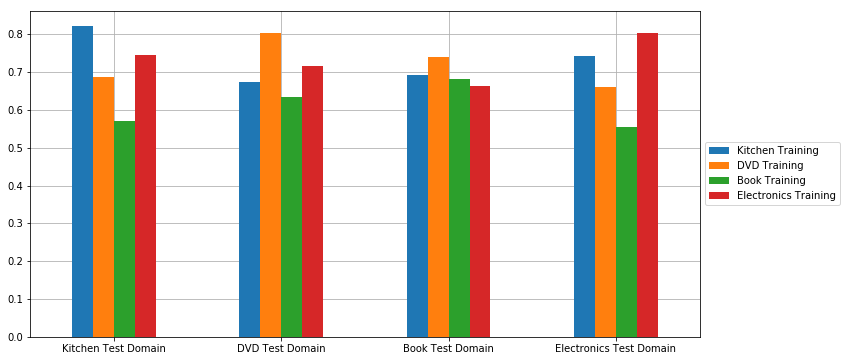

In [563]:
#df = pd.DataFrame(storage_list, index=['Kitchen Trained', 'DVD Trained', 'Book Trained', 'Electronics Trained'])
df = pd.DataFrame(storage_list)
df.index = ['Kitchen Test Domain', 'DVD Test Domain', 'Book Test Domain', 'Electronics Test Domain']
df.columns = ['Kitchen Training', 'DVD Training', 'Book Training', 'Electronics Training']
display(df)

df.plot(kind='bar', stacked=False, rot=0, figsize=(12,6), legend=False, zorder=10)
plt.grid(zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

The question asks us to test different domains with different training data. To do this we will train a classifer with each  training data domain and apply the classifier to the 4 domains we have to produce an accuracy result. $4\ x\ 4$ Combinations are possible as this each test domain against each training domain. 

I computed all of these using nested for-loops, one loop to train the classifer for a training data set and then another to get the accuracy from the classification of each test domain. After collecting the data, I stored it within a list to be used by pandas for creating the table.

I expected that the classifiers trained would achieve the highest accuracy on the respective test domain that it is a part of. 

Viewing my results I can see that this is true for Kitchen, Test and Electronics, however once more the book classifier performs poorly, being outclassed in accuracy by the classifer for the DVD.

c) Adapt your code so that you can build and use a training set built from multiple categories.  Now **investigate** how having a mixture of source domains affects the accuracy of the Naive Bayes classifier on the target domain.  Make sure you control for or consider how much any improvements are due to the quantity of the training data. \[9 marks\]

In [555]:
def populate_multiple(sources):
    training_docs = []
    for each_source in sources:
        if(len(sources) == 1):
            training_docs += get_training_test_data(each_source)[0]
        if(len(sources) == 2):
            training_docs += get_training_test_data(each_source,0.35)[0]
        if(len(sources) == 3):
            training_docs += get_training_test_data(each_source,0.23335)[0]
        if(len(sources) == 4):
            training_docs += get_training_test_data(each_source,0.175)[0]
    return training_docs

Topic_Combo_1_1 = ["kitchen"]
Topic_Combo_1_2 = ["dvd"]
Topic_Combo_1_3 = ["book"]
Topic_Combo_1_4 = ["electronics"]
Topic_Combo_2_1 = ["kitchen", "dvd"]
Topic_Combo_2_2 = ["kitchen", "book"]
Topic_Combo_2_3 = ["kitchen", "electronics"]
Topic_Combo_2_4 = ["dvd", "book"]
Topic_Combo_2_5 = ["book", "electronics"]
Topic_Combo_2_6 = ["dvd", "electronics"]
Topic_Combo_3_1 = ["kitchen", "dvd", "book"]
Topic_Combo_3_2 = ["kitchen", "dvd", "electronics"]
Topic_Combo_3_3 = ["electronics", "dvd", "book"]
Topic_Combo_4_1 = ["kitchen", "dvd", "book", "electronics"]
Topic_List = []
Topic_List.extend([Topic_Combo_1_1, Topic_Combo_1_2, Topic_Combo_1_3, Topic_Combo_1_4])
Topic_List.extend([Topic_Combo_2_1, Topic_Combo_2_2, Topic_Combo_2_3, Topic_Combo_2_4, Topic_Combo_2_5,Topic_Combo_2_6])
Topic_List.extend([Topic_Combo_3_1, Topic_Combo_3_2, Topic_Combo_3_3])
Topic_List.extend([Topic_Combo_4_1])
Train_Data_1S = []
Train_Data_2S = []
Train_Data_3S = []
Train_Data_4S = []
Total_Train_Data =[]
Total_Train_Data.extend([Train_Data_1S, Train_Data_2S, Train_Data_3S, Train_Data_4S])
Test_Data = []

for topic in Topic_Combo_4_1:
    Test_Data.append(get_training_test_data(topic)[1])

for each_list in Topic_List:
    if(len(each_list) == 1):
        Train_Data_1S.append(populate_multiple(each_list))
    if(len(each_list) == 2):
        Train_Data_2S.append(populate_multiple(each_list))
    if(len(each_list) == 3):
        Train_Data_3S.append(populate_multiple(each_list))
    if(len(each_list) == 4):
        Train_Data_4S.append(populate_multiple(each_list))

This code is building the test data for the question, it requires us to produce a training set built from multiple source domains. Mixing the domains will require slicing the training data documents to preserve the original 0.7 ratio of training documents to test data. I have arbitrarily chosen to code each possible combination of data, which I have written out by hand. 

I built a function called populate multiple which takes a list of the training sources, it then produces the correct amount of training data required by slicing the training data at an appropriate ratio for each topic present in the list of sources. This is returned and for-loop was used to store each training data in an apropriate list for the number of sources.

In [556]:
current_accuracy_list = []
current_train_accuracy_dict = {}
total_accuracy_dict = {}
c_list = 0 #Current doc in Training List 
c_t_list = 0 #Current Training List
for test_domain in Test_Data:   
    for training_list in Total_Train_Data:
        current_accuracy_list.clear()
        for training_doc in training_list:
            classifier = nltk.NaiveBayesClassifier.train(training_doc)    
            current_accuracy_list.append(round(nltk.classify.accuracy(classifier, test_domain),4))
        current_train_accuracy_dict[c_list] = current_accuracy_list.copy()
        c_list += 1
    total_accuracy_dict[c_t_list] = current_train_accuracy_dict.copy()
    c_t_list += 1
    c_list = 0
    current_train_accuracy_dict.clear()

This part of the code collects the accuracy results. A loop trains the classifer for each training set and tests it against the 4 domains available, this is then all stored appropriately.

,Book Testing Domain,DVD Testing Domain,Electronics Testing Domain,Kitchen Testing Domain
Kitchen,0.6933,0.6750,0.7417,0.8217
DVD,0.7400,0.8033,0.6617,0.6883
Book,0.6817,0.6333,0.5550,0.5717
Electronics,0.6633,0.7167,0.8033,0.7467


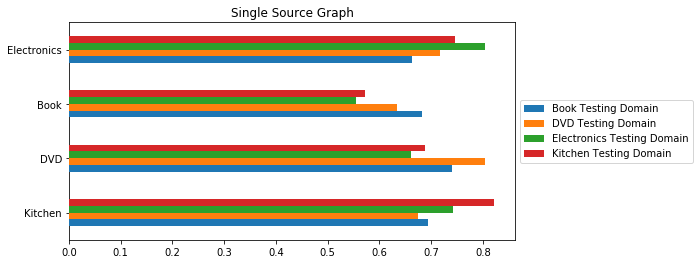

,Book Testing Domain,DVD Testing Domain,Electronics Testing Domain,Kitchen Testing Domain
Kitchen + DVD,0.7267,0.8167,0.7200,0.8033
Kitchen + Book,0.6983,0.6800,0.6617,0.7600
Kitchen + Electronics,0.6450,0.7233,0.8250,0.8350
DVD + Book,0.7150,0.6933,0.5883,0.5867
DVD + Electronics,0.6583,0.6583,0.6667,0.6967
Book + Electronics,0.7133,0.8083,0.7567,0.7133


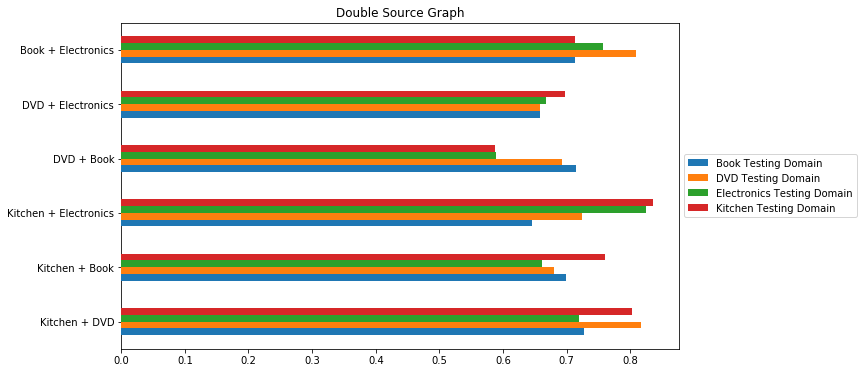

,Book Testing Domain,DVD Testing Domain,Electronics Testing Domain,Kitchen Testing Domain
Kitchen + DVD + Book,0.8133,0.8100,0.7467,0.8183
Kitchen + DVD + Electronics,0.7100,0.8067,0.7750,0.8133
Electronics + DVD + Book,0.7950,0.7967,0.7250,0.7133


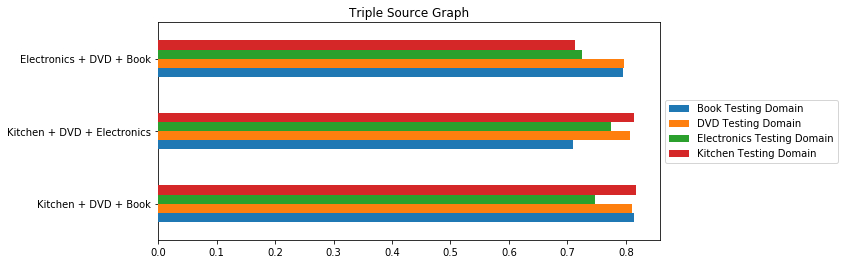

,Book Testing Domain,DVD Testing Domain,Electronics Testing Domain,Kitchen Testing Domain
Kitchen + DVD + Book + Electronics,0.755,0.7883,0.7167,0.74


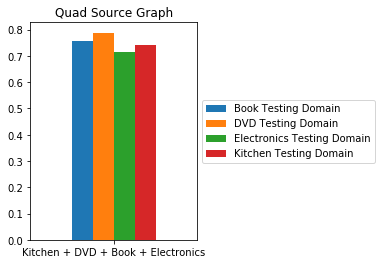

In [559]:
def populate_numbered_sort_dict(x):
    x -= 1
    d = {
        "Kitchen Testing Domain":total_accuracy_dict[0][x],
        "DVD Testing Domain":total_accuracy_dict[1][x],
        "Book Testing Domain":total_accuracy_dict[2][x],
        "Electronics Testing Domain":total_accuracy_dict[3][x],
    }
    return d.copy()

OneSource = populate_numbered_sort_dict(1)
TwoSource = populate_numbered_sort_dict(2)
ThreeSource = populate_numbered_sort_dict(3)
FourSource = populate_numbered_sort_dict(4)

df = pd.DataFrame(OneSource)
df.index = ('Kitchen','DVD','Book','Electronics')
display(df)
df.plot(kind='barh', stacked=False, rot=0, figsize=(8,4), legend=False, zorder=10, title=("Single Source Graph"))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

df = pd.DataFrame(TwoSource)
df.index = ('Kitchen + DVD','Kitchen + Book','Kitchen + Electronics','DVD + Book', 'DVD + Electronics','Book + Electronics')
display(df)
df.plot(kind='barh', stacked=False, rot=0, figsize=(10,6), legend=False, zorder=10, title=("Double Source Graph"))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

df = pd.DataFrame(ThreeSource)
df.index = ('Kitchen + DVD + Book','Kitchen + DVD + Electronics','Electronics + DVD + Book')
display(df)
df.plot(kind='barh', stacked=False, rot=0, figsize=(9,4), legend=False, zorder=10, title=("Triple Source Graph"))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

df = pd.DataFrame(FourSource)
df.index = ['Kitchen + DVD + Book + Electronics']
display(df)
df.plot(kind='bar', stacked=False, rot=0, figsize=(3,4), legend=False, zorder=10, title=("Quad Source Graph"))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


The data produced from the resulting for loop is now displayed. Each training set will produces its own table and graph.

Before analysing the data, I predict that the classifiers that have been given training data for the domain that will be classified will perform better than if they have no training data from test domain. 

Looking at the single source data, we can see the same results as before in our part b. Every classifier performs best in their own category par book, which is beaten by dvd.

The double source data graph shows confirms my prediction as the combined training data which contains data from the same domain as the testing data results in higher accuracy than if without, this is further supported in the triple source graph and table.

Interestingly looking at the quad source graph, we can see that overall, by taking training data from each domain, the classifier has a greater accuracy for each test domain than if it was tested without, over all sources.


## Question 3: Document Similarity (25 marks)
The objective of this question is to investigate whether incorporating lexical knowledge from WordNet might improve document similarity methods.  For example, knowing that both *tiger* and *leopard* are hyponyms of *big_cat* should increase the similarity between a document mentioning a *tiger* and a document mentioning a *leopard*.

The code below will generate two document collections, both in bag-of-words format, one from the Medline Corpus and one from the Wall Street Journal corpus.

In this question, there are marks available for the quality of your code and the quality of your explanations.

In [569]:
from sussex_nltk.corpus_readers import MedlineCorpusReader
from sussex_nltk.corpus_readers import WSJCorpusReader
from nltk.stem.wordnet import WordNetLemmatizer

def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    tokenlist=["NUM" if token.isdigit() else token for token in tokenlist]
    tokenlist=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in tokenlist]
    tokenlist=["NUM" if re.search("^[+-]?[0-9]+\.[0-9]",token) else token for token in tokenlist]
    return tokenlist

def filter_stopwords(tokenlist):
    stop = stopwords.words('english')
    return [w for w in tokenlist if w.isalpha() and w not in stop]

def stem(tokenlist):
    st=WordNetLemmatizer()
    return [st.lemmatize(token) for token in tokenlist]

   
def make_bow(somestring):
    rep=word_tokenize(somestring)  #step 1
    rep=normalise(rep)   #step 2
    rep=stem(rep)   #step 3
    rep=filter_stopwords(rep)  #step 4
    dict_rep={}
    for token in rep:
        dict_rep[token]=dict_rep.get(token,0)+1  #step 5
    return(dict_rep)

wsj=WSJCorpusReader()
medline=MedlineCorpusReader()

collectionsize=50
collections={"wsj":[],"medline":[]}

for key in collections.keys():
    if key=="wsj":
        generator=wsj.raw()
    else:
        generator=medline.raw()
    while len(collections[key])<collectionsize:
        collections[key].append(next(generator))

bow_collections={key:[make_bow(doc) for doc in collection] for key,collection in collections.items()}

a). For each step in the `make_bow()` function, **explain** what it does and why it is applicable when creating document representations for document similarity methods. \[8 marks\]

#### make_bow() -- aka Make Bag of Words

**Step 1** -- The first step here is to produced a tokenised list from an input defined as somestring. This will be of the form: $TokenList=\{'Item_1\ ',\ \ldots \ , \ 'Item_n'\}$ -- This collections holds our tokens, which have been found in the string. When applied to a document it will break the document down to a store of all the elements separated by whitespace, new line breaks and indentation in a list. This is assigned to a variable labelled 'rep'. Tokenisation is an important procedure as the list as a way of iterating and accessing items that can represent a document without having to deal a document being represented by a string variable.

**Step 2** -- This step reduces the list created from step 1 in several important ways. A function called normalise is called, this performs the following on the given list; every item in the list is moved to lowercase as capitalisation is unimportant for classification. Numbers are then removed from the list. The last step my miss numbers that have words attached to them, so the next step removed a number letter combination such as 1st, 2nd and 4th (However an item such as 3rd would pass this). The function then searches for any instance of a decimal and removes it. After this the list is returned a assigned to 'rep'.

**Step 3** -- The list is now passed to a function stem. Stem creates a 'WordNetLemmatizer' which is then used to lemmatize each item in the list. 'rep' is updated to the returned list. Lemmatisation is the process of identifying multiple forms of the same word into a single meaning, an example of this would be wolves to wolf. A key aspect of lemmatisation is how the lemmatised word still works in the context of a given document as this is important to how a group of similar words would reduce. An Example: meeting could be reduced to meet, however the sentence "We are meeting soon" would be made incoherent, so this action would probably not be taken.

**Step 4** -- The list is now passed to another function, 'filter_stopwords;. This function runs the list through a return list iteration which checks if the item is alpha and a stopword. For an item to be alpha it needs to contain no spaces, and digits in it. A stopword is classified as a word that is deemed insignificant for search queries, they are typically removed due to how common they are in a search and would return a large amount of data that is not intended. Stopwords are language dependant so the function defines English here. An example stopword is 'a', this is used so commonly in the English lexicon it would return an enormous of documents if searched. Stop words are removed, which will reduce the list of items to words that are most significant. 

At this point in the function, the data type is changed from a list to dictionary so a dictionary variable is created, a for loop is then used to traverse the whole list.

**Step 5** -- Each item in the list is used as a key in the dictionary, at each instance of the key being added to the dictionary the value is set to 1. In this datatype, each item held is a joint entity of a 'key' and a 'value'. Each token becomes the key in the dictionary with each instance of the same token being found causing the count to increase from 1.

**Returns** -- The function now returns the newly created dictionary to be used.

The term bag of words is used as we have transformed a document into an iteritable object which shows the most noteworthy and important aspects of this document and the frequency they occur at in way that can now be used by a document classifier in a manner this is far easier than before. For example, if we were to inspect the bow for a document and saw the most common words revolved around a topic such as food; the words could be 'taste', 'flavour', 'smell', a person would be able to classify this document.


b). Apply a TF-IDF weighting to the representations and then compute: 
* the average cosine similarity of medline documents to each other, 
* the average cosine similarity of WSJ documents to each other,
* the average cosine similarity of medline documents to WSJ documents
\[8 marks\]

In [580]:
import math
bow_collections={key:[make_bow(doc) for doc in collection] for key,collection in collections.items()}

def doc_freq(doclist):
    mylist = doclist.copy()
    df={}
    for doc in mylist:
        for feat in doc.keys():
            df[feat]=df.get(feat,0)+1        
    return df

def dot(docA,docB):
    the_sum=0
    for (key,value) in docA.items():
        the_sum+=value*docB.get(key,0)
    return the_sum

def cos_sim(docA,docB):
    sim=(dot(docA,docB)/(math.sqrt(dot(docA,docA)*dot(docB,docB))))
    return sim

def idf(doclist):
    N=len(doclist)
    return {feat:math.log(N/v) for feat,v in doc_freq(doclist).items()}

#All definitions up to this point are sample answers supplied in lab solutions
#They have been used as tools to create the proper answers required by the questions

def tf_idf(doclist,doc_idf):
    dock_tf_list = [] #A collection to hold the list of documents that have had tf-idf appllied to them
    for doc in doclist: #Iterate through each document in document list
        for (word,val) in doc.items(): #Working with each key:value pair, in the dictionary, iterate through the doc
            doc[word] = val * (doc_idf[word]) #find the corisponding values, and apply the idf value, they already contain the tf val
        dock_tf_list.append(doc) #Append the revised list to our collection
    return dock_tf_list #Return list

def avg_cos_sim(docList1,docList2): # Average Cosine Similarity, Each document will produce a cos_sim for each corrispoding doc
    #With 50 documents in each list, we will have 2500 cos_similarities.
    cos = list() #List to hold all 2500 cos_sim
    for current_l1 in docList1: # Loop through each document in the first document list
        for current_l2 in docList2: # Loop through each document in the second document list
            cos.append(cos_sim(current_l1,current_l2)) #Using our functions to produce a cos_sim,
            #This is with a vector method
            #
            # Doc1: (Word_1: 'a_1',   Doc1: (Word_1: 'b_1',
            #        Word_2: 'a_2'           Word_2: 'b_2'
            #        Word_3: 'a_3'           Word_3: 'b_3'
            #        )                       )
            #
            # Each doc can be seen as a vector
            #
    return statistics.mean(cos) #The mean total for the list values is returned

medline_tf_idf = tf_idf(bow_collections['medline'],idf(bow_collections['medline']))
wsj_tf_idf = tf_idf(bow_collections['wsj'],idf((bow_collections['wsj'])))

print("Average cosine similarity for medline to medline: ",avg_cos_sim((medline_tf_idf),(medline_tf_idf)))
print("Average cosine similarity for WSJ to WSJ: ",avg_cos_sim((wsj_tf_idf),(wsj_tf_idf)))
print("Average cosine similarity for medline to WSJ: ",avg_cos_sim((medline_tf_idf),(wsj_tf_idf)))


Average cosine similarity for medline to medline:  0.04253294742509128
Average cosine similarity for WSJ to WSJ:  0.042765676237362896
Average cosine similarity for medline to WSJ:  0.007115179228025695


The cosine similarity when looking at both values compared against each other is shown to be approx. 4% for each one. The average cosine similarity when you compare Medline to WSJ is even lower at 0.7%. These scores are quite low but we must keep into account this is the sum mean of over 2500 comparisons.

c). Expand the document representations by adding **synonyms** and **hypernyms** for each **noun** in the document.  For example, 2 occurrences of the word *tiger* should add 2 occurrences of each of the following **lemma_names** found in the WordNet hypernym hierarchy above *tiger*:
* \['tiger', 'Panthera_tigris'\]
* \['big_cat', 'cat'\]
* \['feline', 'felid'\]
* \['carnivore'\]
* \['placental', 'placental_mammal', 'eutherian', 'eutherian_mammal'\]
* \['mammal', 'mammalian'\]
* \['vertebrate', 'craniate'\]
* \['chordate'\]
* \['animal', 'animate_being', 'beast', 'brute', 'creature', 'fauna'\]
* \['organism', 'being'\]
* \['living_thing', 'animate_thing'\]
* \['whole', 'unit'\]
* \['object', 'physical_object'\]
* \['physical_entity'\]
* \['entity'\]

Recompute the similarities calculated in part b).  Discuss your results. \[9 marks\]

In [581]:
from nltk.corpus import wordnet
bow_collections={key:[make_bow(doc) for doc in collection] for key,collection in collections.items()}
nouns = {x.name().split('.', 1)[0] for x in wordnet.all_synsets('n')} #From an online resource, creates a dictionary of all wordnet nouns

def distance_to_root(asynset, MYLIST):
    """
    Produce the full list of hypernyms with a recursion call
    :param asynset: A synset which is of the form ('someword.x.01'), where x is the value indicating the type of word, number showing how many of this type has these senses.
    :param MYLIST: A list of all current words that are prodcuded by this recursive function
    :return: 0 indicating we are at the end of the hierarchy for one tree, or another call to continute populating the list MYLIST
    """
    hypernyms=asynset.hypernyms() #Assign set of all hypernyms
    for each_hyp in hypernyms: # Iterate of every synset in hpyernyms
        MYLIST.append(each_hyp.lemma_names()) #Add all hypername lemma names to our list collections
    if len(hypernyms)==0: 
        return 0
    else:
        return (distance_to_root(hypernyms[0], MYLIST)+1)

def addHyps(documentList, MYLIST):
    """
    Add all the hypernyms for each noun in a document in the given documentList,
    :param documentList: A list of all documents that are being affected
    :param MYLIST: A list of all current words that are prodcuded by this recursive function
    :return: current_doc_list which is the list of all documents that have been updated
    """
    current_doc_list = [] # Declare the new list
    for document in documentList: # Iterate through each document in the document list
        current_doc = document.copy() # Make a copy of the current document to amend
        for (word,val) in document.items(): # For each key and val pair in the document
            if word in nouns: #Check if the word we have found is a noun
                for each_set in wordnet.synsets(word): #If YES, for itearte through the noun synonyms adding them
                    distance_to_root(each_set, MYLIST) #Call the function to append items to the list
                    for eachlist in MYLIST: #Iterate through the list of hypernym list
                        for each_hyp in eachlist: # Iterate through each word in the hpyernym list
                            current_doc[each_hyp] = current_doc.get(each_hyp,0) + val 
                            #The value at the selected hypernym will be the existing value plus the document freq of the wordhence why val is added
                    MYLIST = [] # Refresh the list to be used for the next noun
        current_doc_list.append(current_doc) #Add the amened doc to our list 
    return current_doc_list #Return the new document list of amended documents


medline_col = addHyps(bow_collections['medline'], MYLIST)
wsj_col = addHyps(bow_collections['wsj'], MYLIST)

medline_tf_idf = tf_idf(medline_col,idf(medline_col))
wsj_tf_idf = tf_idf(wsj_col,idf((wsj_col)))

print("Average cosine similarity for medline to medline: ",average_cos_sim((medline_tf_idf),(medline_tf_idf)))
print("Average cosine similarity for WSJ to WSJ: ",average_cos_sim((wsj_tf_idf),(wsj_tf_idf)))
print("Average cosine similarity for medline to WSJ: ",average_cos_sim((medline_tf_idf),(wsj_tf_idf)))


Average cosine similarity for medline to medline:  0.10513230741686302
Average cosine similarity for WSJ to WSJ:  0.10102519799711758
Average cosine similarity for medline to WSJ:  0.05735666821782966


Comparing the average cosine similarity across the board, for each result we can see that it has increased. This was predicted as by adding the hypernym tree of each noun we can now allow the documents to more broadly see how they are classified. Thus when comparing the Medline documents to each other, they have a new similarity of 10%. With a similar result for the wsj to wsj.

The similarity for the Medline to wsj has also increased as when making both data sets more general, there are more cases for the documents to be similar on leading to a better cosine similarity.


## Question 4: Supervised Methods for WSD (25 marks)
The objective of this question is to build and evaluate a word sense disambiguation (WSD) system for words with multiple senses.  

a).  For each word occurring in the medline corpus (defined above), **write code** to find how many senses it has according to WordNet.  Print a list of the 10 most frequently occurring words with 2 senses (in this corpus). \[4 marks\]

In [584]:
from nltk.corpus import wordnet as wn
two_sense_vals = []
def takeSecond(elem):
    return elem[1]
for (key,val) in doc_freq(bow_collections['medline']).items():
    if len(wn.synsets(key)) == 2:
        c_val = [key,val]
        two_sense_vals.append(c_val)
two_sense_vals.sort(key=takeSecond,reverse=True)
display(two_sense_vals[:10])

[['membrane', 10],
 ['temperature', 7],
 ['molecular', 7],
 ['uptake', 6],
 ['data', 6],
 ['molecule', 6],
 ['may', 5],
 ['amino', 5],
 ['phenomenon', 5],
 ['ratio', 4]]

A simple looping structure which first loops through each value in doc freq of the medline corpus, this already holds the info of all the words and how many times they appear. The words with only two senses are found and then we sort the remaining list by the value.

b). A *supervised* WSD algorithm derives model(s) from *sense-annotated corpus data* in order to predict senses of ambiguous words in un-annotated data.  Using the entire document as context, **implement** a supervised word sense disambiguation algorithm to determine the most likely sense of each occurrence of the 3 most frequently occuring words identified in part a). \[8 marks\]

In [546]:
import operator 
mdl = (bow_collections['medline'])

def max_sim(word,contextlemmas,pos=wn.NOUN):
    synsets=wn.synsets(word,pos)
    scores=[]
    for synset in synsets:
        total=0
        for lemma in contextlemmas:
            sofar=0
            for synsetB in wn.synsets(lemma,pos):
                if not pos == wn.NOUN:
                    sofar = 0
                else:
                    sim=wn.path_similarity(synset,synsetB)
                    if sim>sofar:
                        sofar=sim
            total+=sofar
        if pos == wn.NOUN:
            scores.append((synset.definition(),total))
        else:
            scores.append(("Pos type was not valid",total))
    sortedscores=sorted(scores,key=operator.itemgetter(1),reverse=True) 
    #print(sortedscores)
    if sortedscores == None:
        print("test")
    return sortedscores[0]

#Max_Sim is a function taken from the solutions to the lab exercises

def create_sense_annotated_data(documents, pos=wn.NOUN): #Creates a list that can be worked with by our WSD
    text_docs = []# Set up list for our strings
    for doc in documents: #Iterate through each document in documents 
        my_string = "" # New String set up
        for (word,val) in doc.items(): #Take each word in the doc and add it to a string followed by a whitespace char
            my_string += word
            my_string += " "
        text_docs.append(my_string) #Append each string to our list
    return text_doc 

def wsd(word, documents, pos=wn.NOUN):
    max_sim_result = []
    for doc in documents:
        if word in doc:
            max_sim_result.append(max_sim(word,doc,pos)) # Create a list of all the wsd results
    return max_sim_result

display(wsd('membrane',mdl))
display(wsd('temperature',mdl))
display(wsd('molecular',mdl,wn.ADJ))

[('a thin pliable sheet of material', 3.95168669050248),
 ('a thin pliable sheet of material', 7.429698079698079),
 ('a thin pliable sheet of material', 4.754265179265181),
 ('a thin pliable sheet of material', 3.336627261627262),
 ('a thin pliable sheet of material', 4.901067396655632),
 ('a thin pliable sheet of material', 3.6527236652236654),
 ('a thin pliable sheet of material', 6.236573149073147),
 ('a thin pliable sheet of material', 6.82847152847153),
 ('a thin pliable sheet of material', 6.458774558774557),
 ('a thin pliable sheet of material', 6.414791580968051)]

[('the degree of hotness or coldness of a body or environment (corresponding to its molecular activity)',
  3.5035464535464547),
 ('the degree of hotness or coldness of a body or environment (corresponding to its molecular activity)',
  4.736392773892774),
 ('the degree of hotness or coldness of a body or environment (corresponding to its molecular activity)',
  2.5900294150294156),
 ('the degree of hotness or coldness of a body or environment (corresponding to its molecular activity)',
  9.555144855144855),
 ('the degree of hotness or coldness of a body or environment (corresponding to its molecular activity)',
  8.085050080638316),
 ('the degree of hotness or coldness of a body or environment (corresponding to its molecular activity)',
  7.836194361194361),
 ('the degree of hotness or coldness of a body or environment (corresponding to its molecular activity)',
  4.828210678210679)]

[('Pos type was not valid', 0),
 ('Pos type was not valid', 0),
 ('Pos type was not valid', 0),
 ('Pos type was not valid', 0),
 ('Pos type was not valid', 0),
 ('Pos type was not valid', 0),
 ('Pos type was not valid', 0)]

c). Evaluate the performance of your WSD system.  How accurate is it for each of the 3 words? **Comment** on the strengths and weaknesses of your WSD system.\[8 marks\] 

The performance of the WSD system is quite poor. We have used a method which requires the pos data type to be set to a value that entails that the only words that can be found to be nouns, and no other of any other type as this will return an error. As for words that it can produce a sense for. It has chosen the exact same sense for every single instance of the word found in the document, the value it return shows how this score is the highest from the others. 

d) How could you extend or improve your WSD system?  You are **not** expected to code any of these extensions or improvements, but your answer should give sufficient details to make it clear how they might be carried out in practice. \[5 marks\]

The first step to improve our wsd system is to change the document type we are giving it. The list contains a document which is generated from the bow collections of our corpus reader. This will help give the document significant meaning in terms of working with word distributions in relation to question 3, however a wsd is sensitive on the data we give it. In our part a we create a loop which translates the data structure into a string which can be used by our wsd. 

The wsd needs a string as the concept of wsd is built on how words are used in conjunction with other words. We get the meaning for words based upon the surrounding words so grammar and order is important. To improve our wsd in a huge way, we could feed it a ordered data, which while still reduced retains elements that identify the grammar of the sentence. Having these two elements will help immensely find the right word sense for a given word as we can see how they fit in with the surrounding words properly now rather than just comparing if they are in the same category as we do in part a.


Use the code below to verify that the length of your submission does not exceed 3000 words.

In [583]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 1202

import io
from nbformat import current

filepath="a1.ipynb"
question_count=1202

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 2623
